# Task 3 - cell type labeling

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy.stats as stats

from statsmodels.stats.multitest import fdrcorrection

In [2]:
adata = sc.read('task2_leiden.h5ad')

In [3]:
labels = pd.read_csv('annotation_levels.csv')

### Feature maps for coarse

In [4]:
cols = []
for c in adata.obs.leiden.drop_duplicates():

    adata.obs[f'is_{c}'] = (adata.obs['leiden'] == c).astype('category')
    cols.append(f'is_{c}')

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.

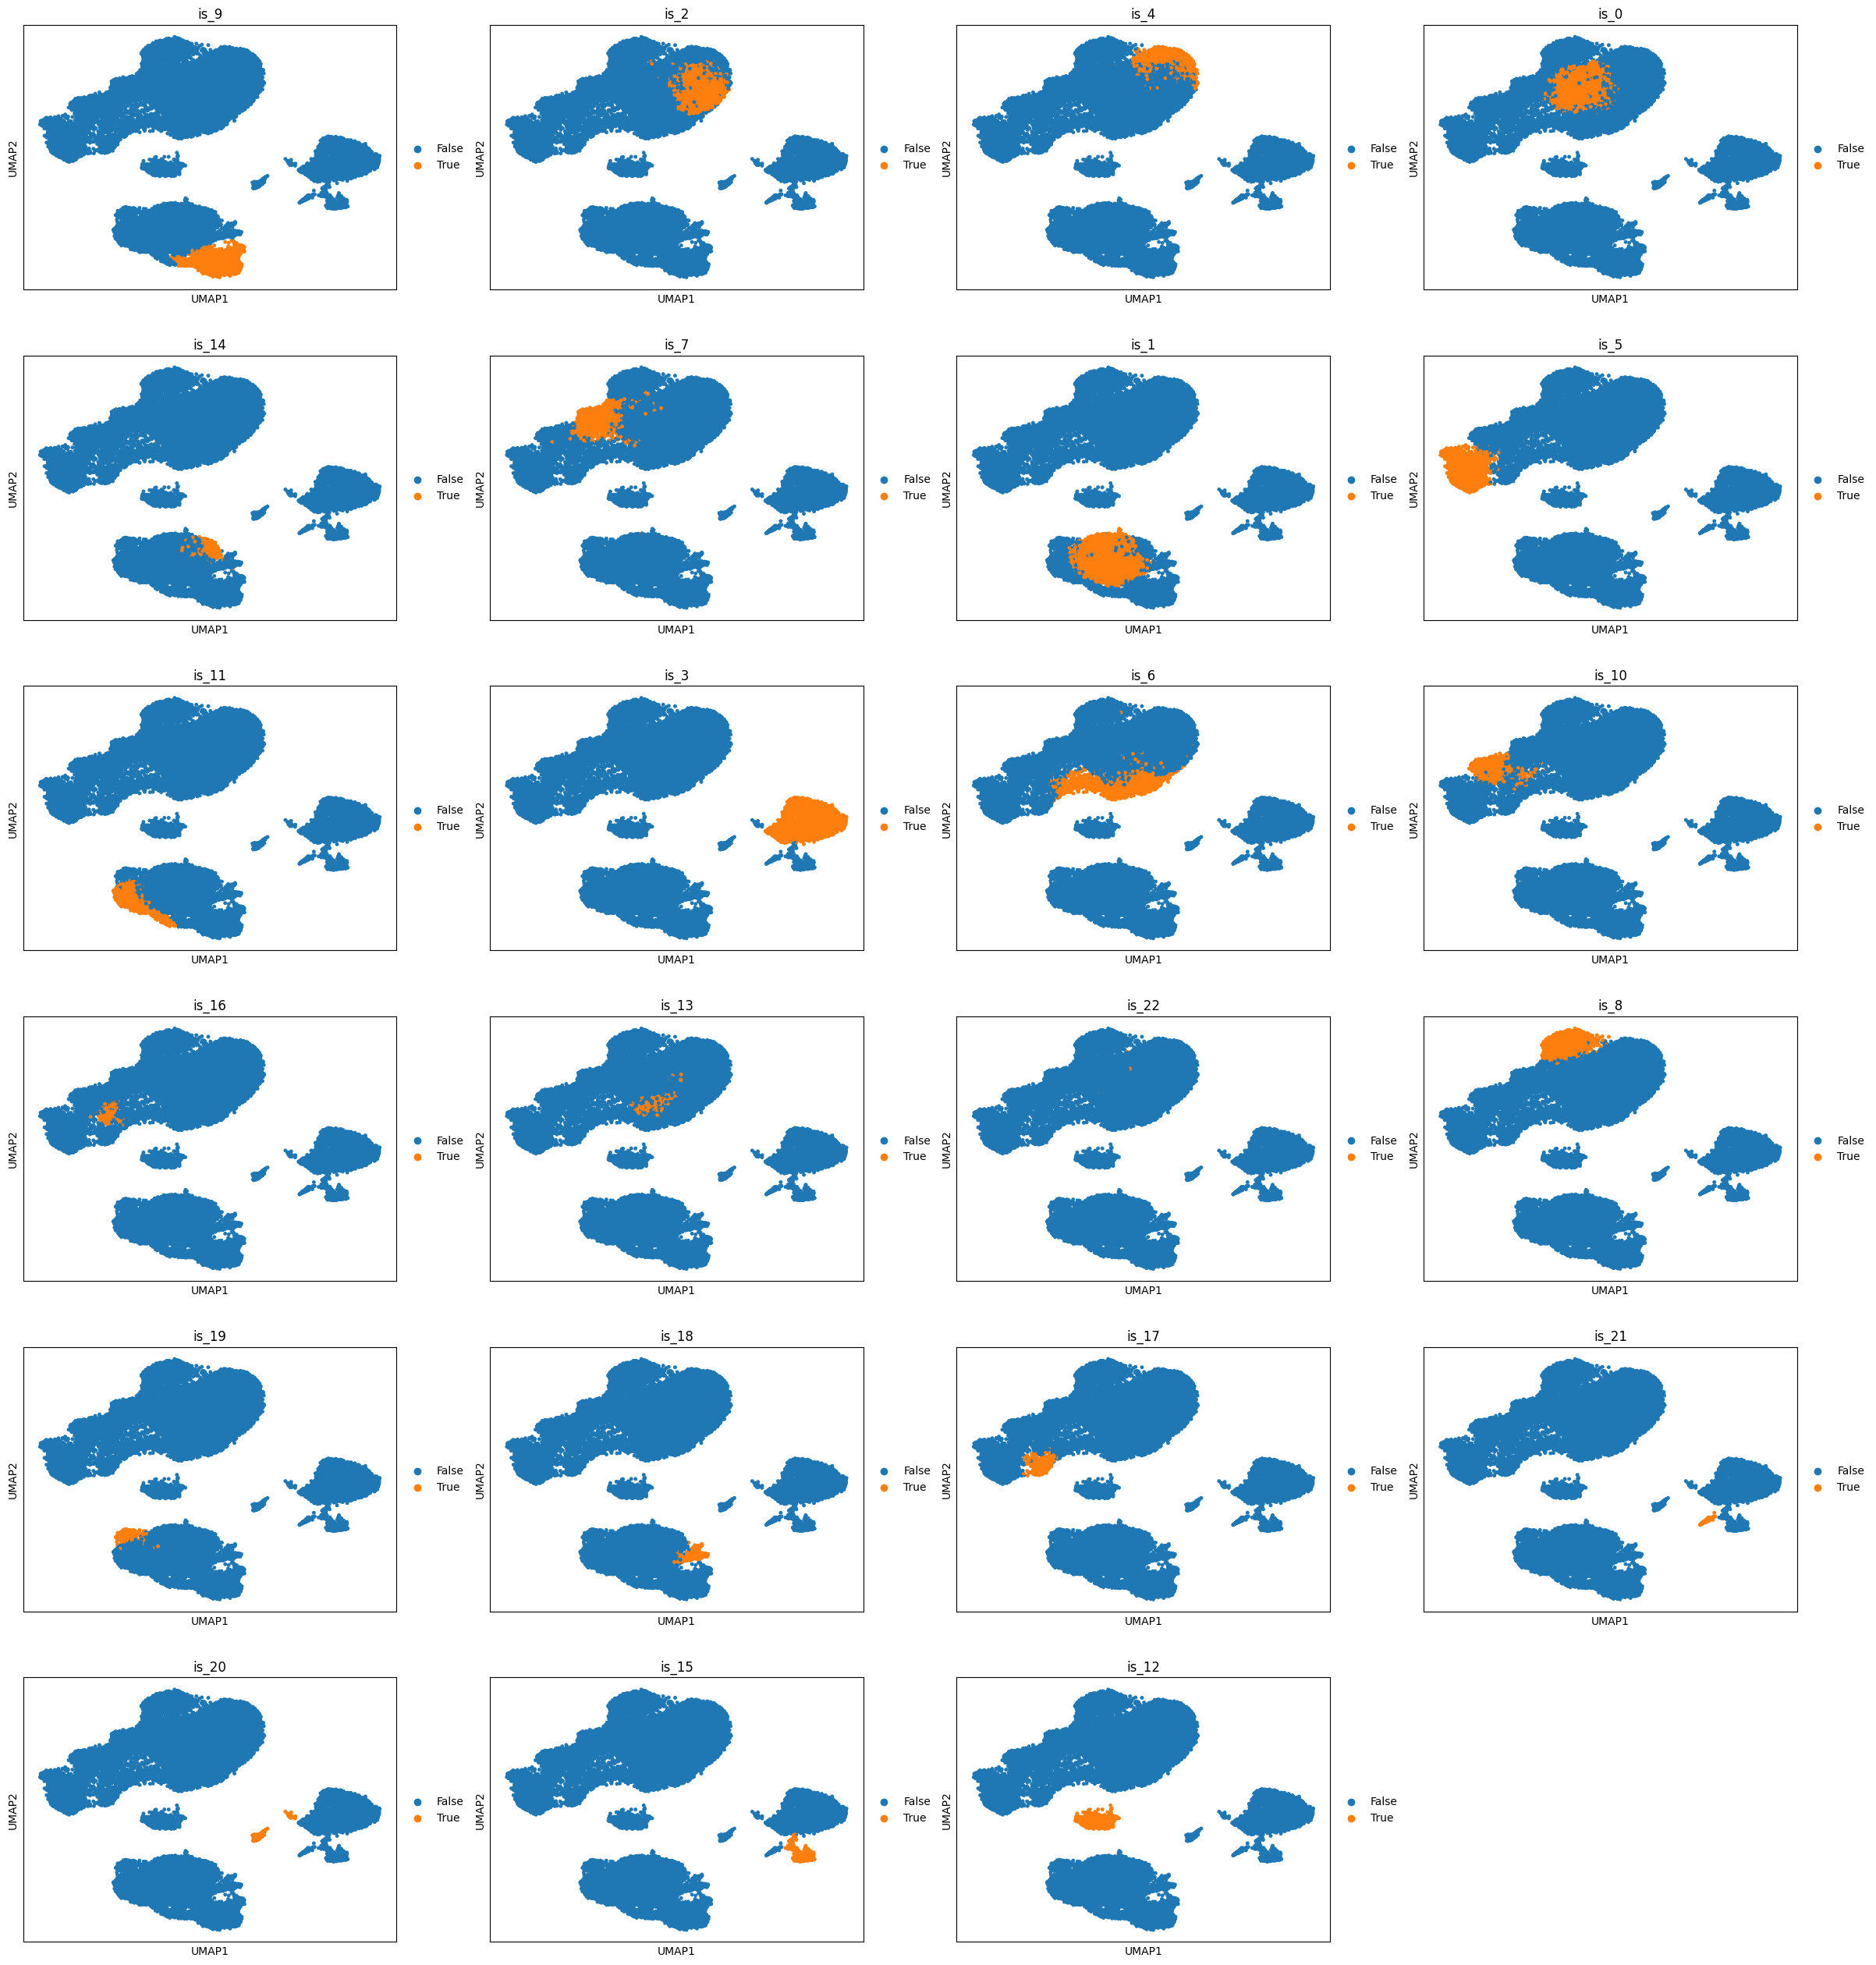

In [5]:
sc.pl.umap(adata, color=cols, s=50)

In [6]:
'TCRG' in adata.raw.var.index

False

In [7]:
markers = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP', 'TRAV1-2', 
           'TRDV2', 'TRGV9', 'TRDC', 'TRDV1', 'B3GAT1', 'ITGAM']

In [8]:
adata.raw.var.shape

(16524, 5)

In [9]:
'IFNB2' in adata.raw.var.index

False

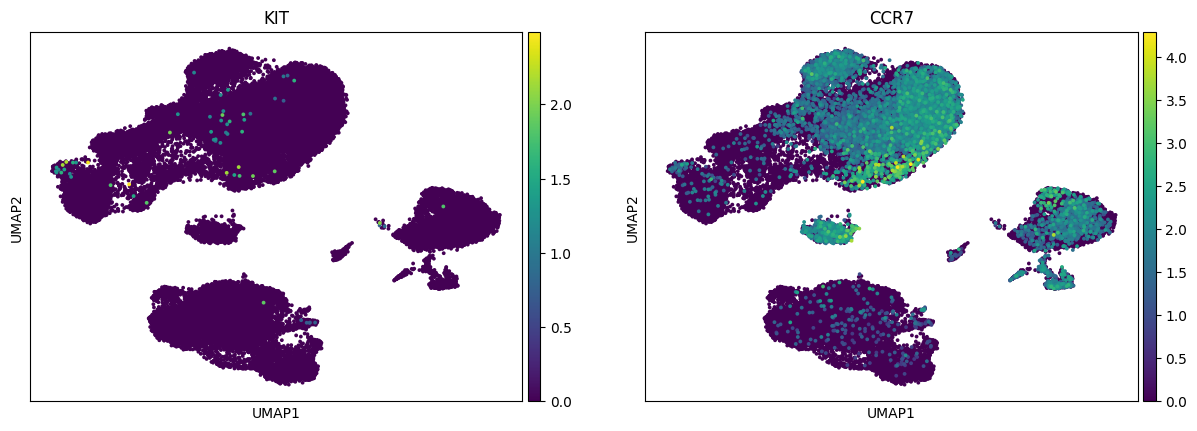

In [10]:
sc.pl.umap(adata, color=['KIT', 'CCR7'], s=30)

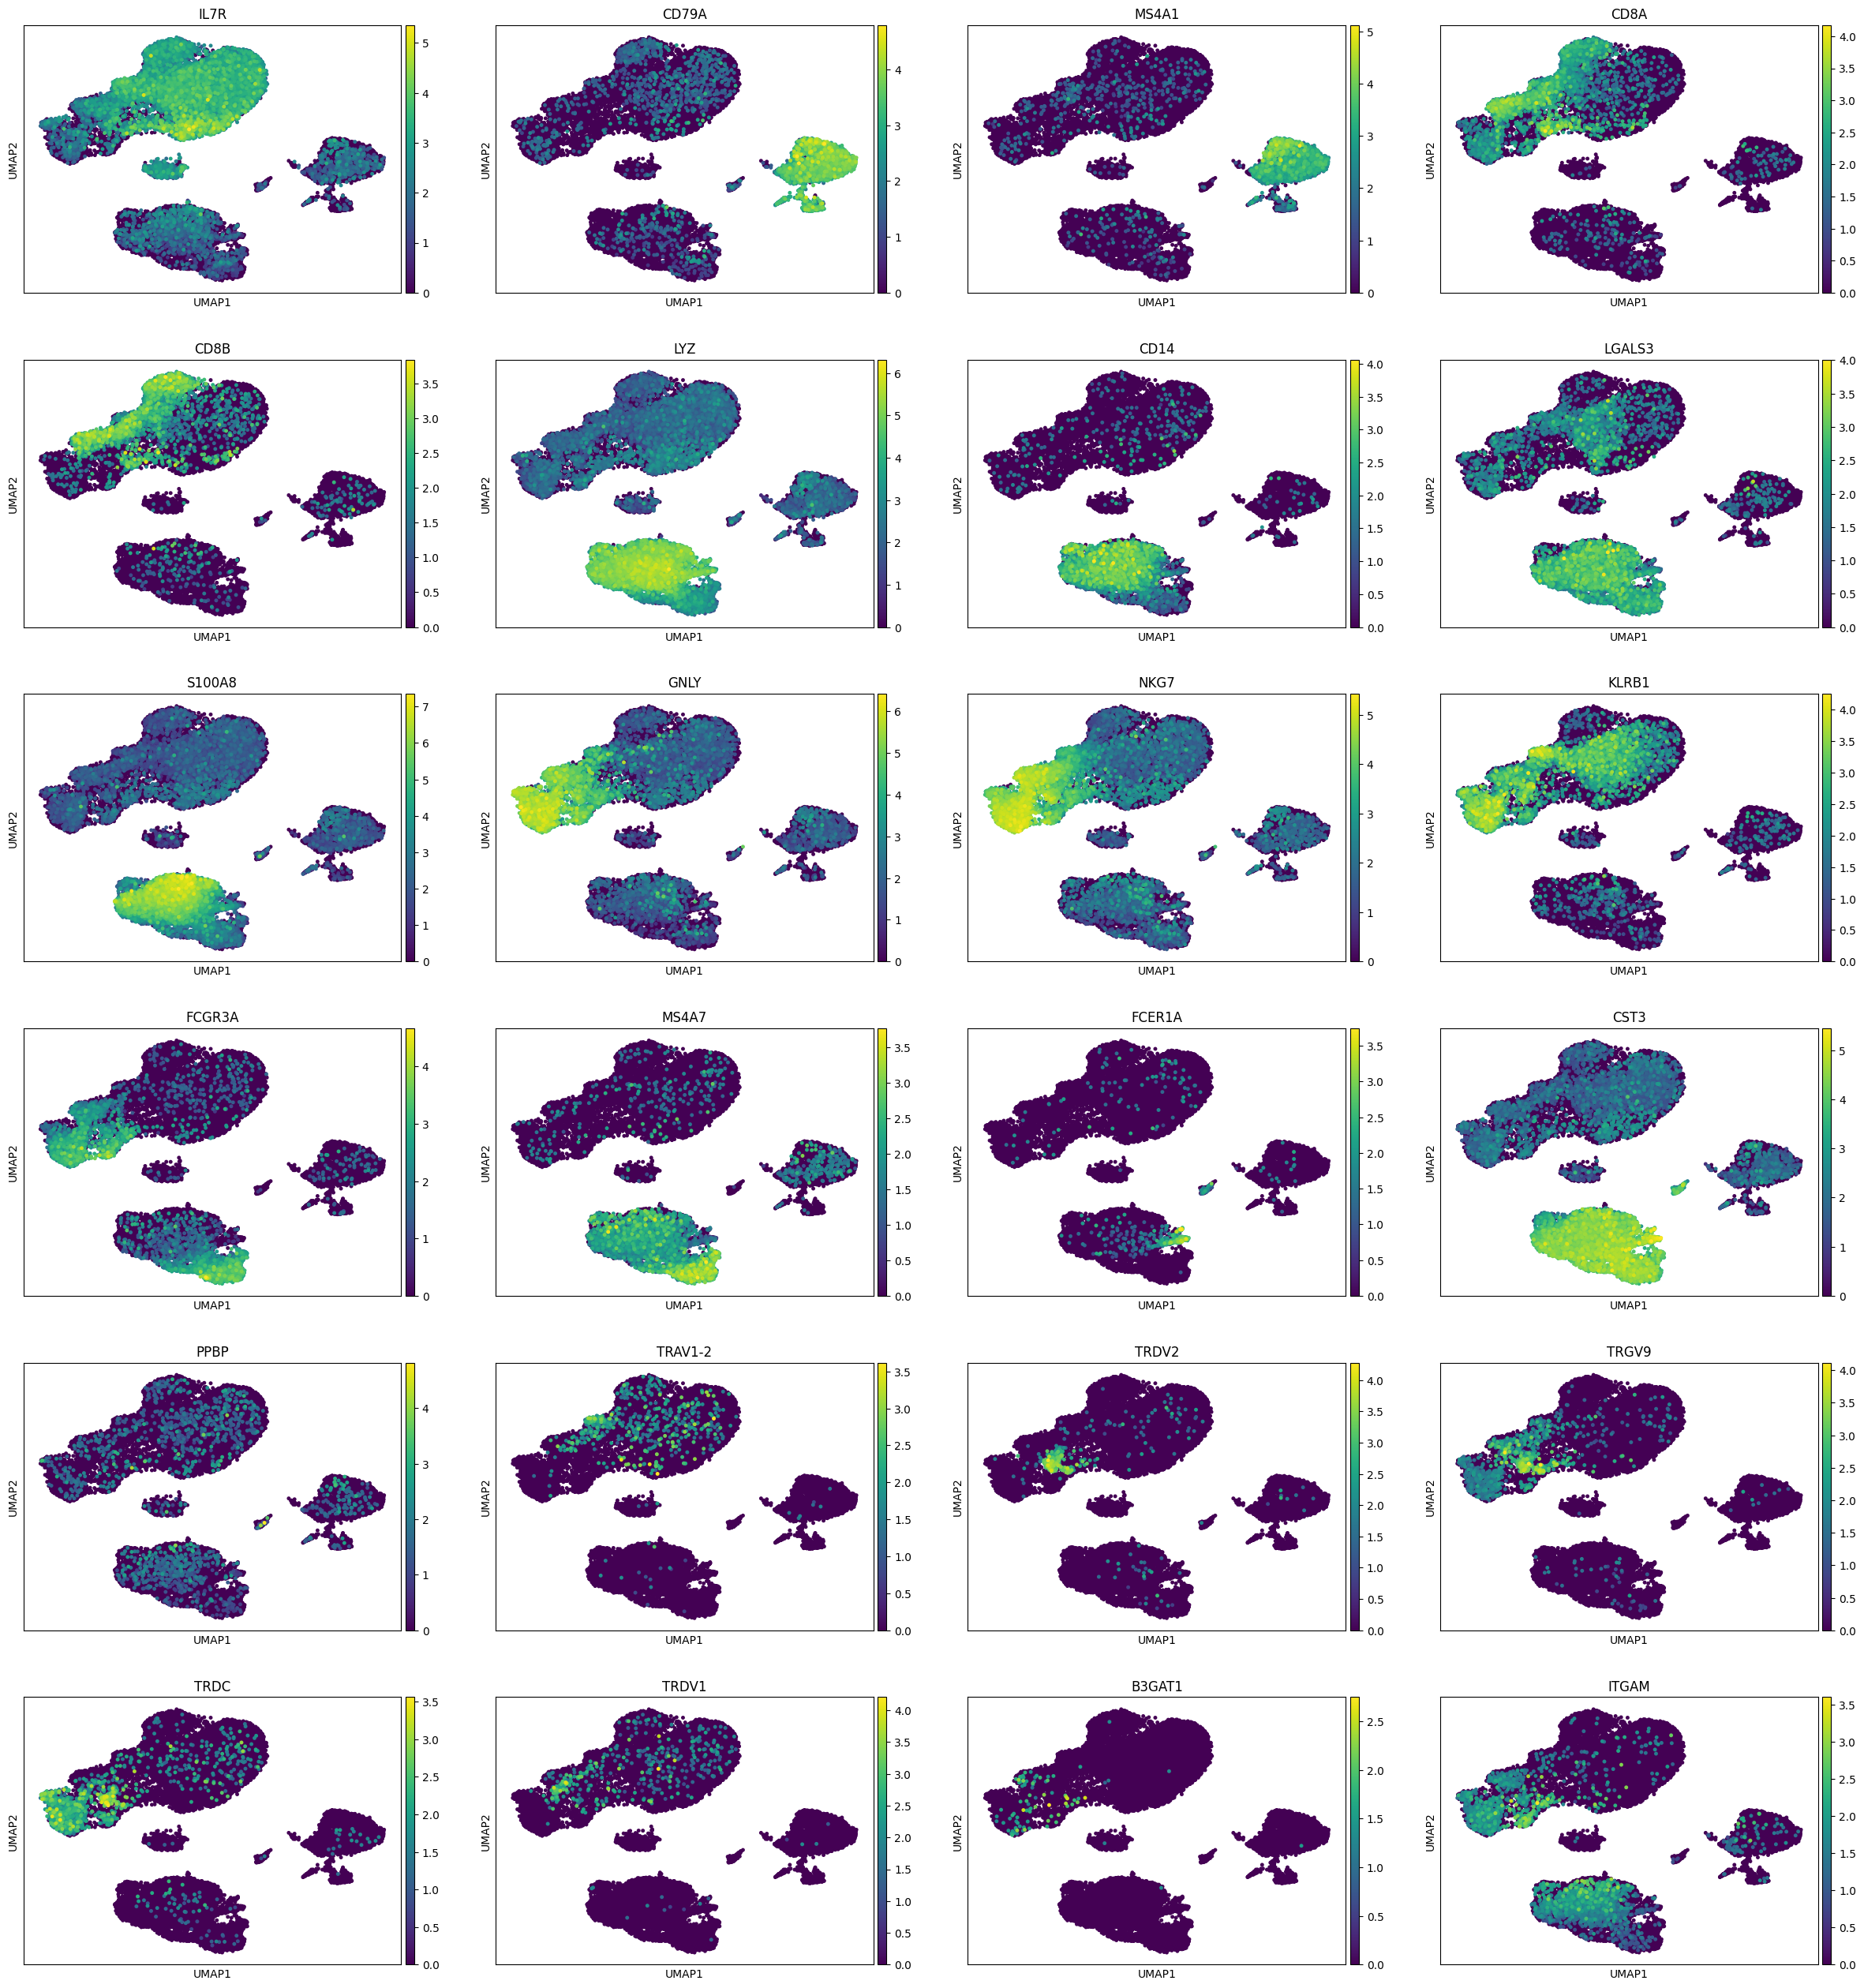

In [11]:
sc.pl.umap(adata, color=markers, s=50)

In [12]:
mappings = {
    '0':'CD4+ T',
    '9':'Mono',
    '2':'CD4+ T',
    '4':'CD4+ T',
    '14': 'Mono',
    '7':'MAIT',
    '1':'Mono',
    '11':'Mono',
    '19':'Mono',
    '18':'DC',
    '5':'NK',
    '3':'B',
    '21':'B',
    '6':'CD4+ T',
    '10':'Cytotoxic CD57+ cells',
    '16':'Gamma Delta T',
    '13':'CD4+ T',
    '22':'CD4+ T',
    '8':'CD8+ T',
    '17':'NK',
    '20':'Megakaryocyte',
    '15':'B?',
    '12':'??'}

In [13]:
adata.obs['qual_ct'] = adata.obs['leiden'].apply(lambda x: mappings[x])

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


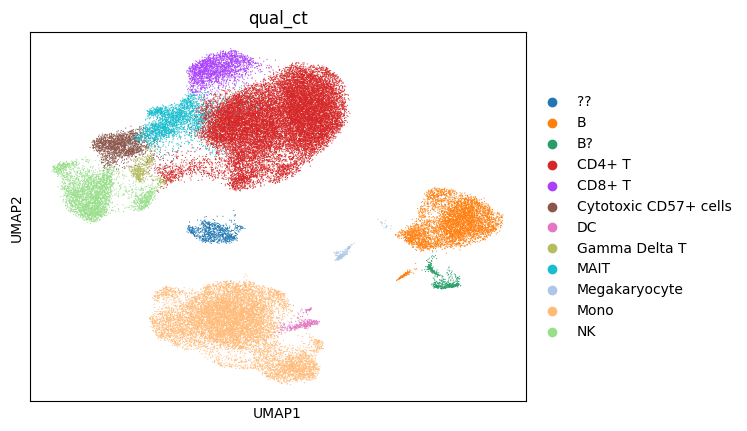

In [14]:
sc.pl.umap(adata, color='qual_ct')

In [15]:
adata.write('task3_coarse.h5ad')

### Fine mapping - CD4 T cells

In [29]:
raw_adata = sc.read('../highly_variable.h5ad')
cd4_barcodes = adata.obs.index[adata.obs['qual_ct'].str.contains('CD4')]

In [30]:
raw_adata.shape

(48518, 16524)

In [31]:
len(cd4_barcodes)

20536

In [32]:
cd4_adata = raw_adata[cd4_barcodes].copy()

In [34]:
def hvg_scale_leiden(obj):

    sc.pp.highly_variable_genes(obj, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pp.scale(obj, max_value=10)
    sc.tl.pca(obj, svd_solver='arpack')
    sc.pp.neighbors(obj, n_neighbors=50, n_pcs=25)
    sc.tl.umap(obj)
    sc.tl.leiden(obj)

In [105]:
sc.tl.leiden(cd4_adata, resolution=1)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


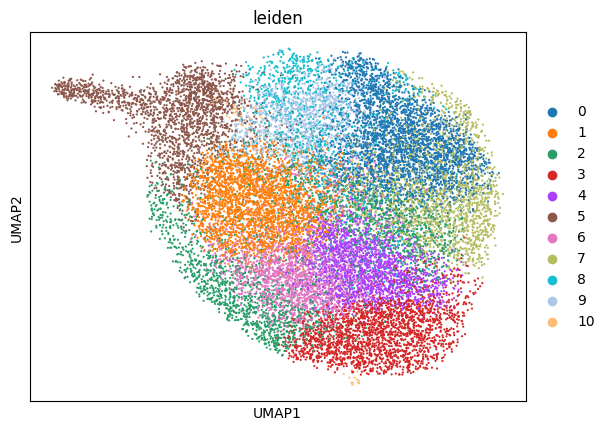

In [106]:
sc.pl.umap(cd4_adata, color='leiden', s=10)

In [107]:
cd4_adata.uns['log1p']["base"] = None

In [108]:
# hvg_scale_leiden(cd4_adata)

In [109]:
cd4_adata.shape

(20536, 16524)

In [111]:
# CD7 anergic
# CD44 activated
# CD62L naive
# CCR7

In [112]:
labels.sort_values('Coarse_annotation_levels')

Fine_annotation_levels Coarse_annotation_levels
21                   MZ B                        B
19         Transitional B                        B
26           Plasma cells                        B
12               Memory B                        B
7                 Naive B                        B
13             Naive Treg                   CD4+ T
10              CM CD4+ T                   CD4+ T
8                Mem Treg                   CD4+ T
27   Proliferating CD4+ T                   CD4+ T
3              EM CD4+ T                    CD4+ T
2            Naive CD4+ T                   CD4+ T
1          Anergic CD4+ T                   CD4+ T
5               EM CD8+ T                   CD8+ T
14        Stressed CD8+ T                   CD8+ T
15           Naive CD8+ T                   CD8+ T
20   Proliferating CD8+ T                   CD8+ T
17  Cytotoxic CD57+ cells    Cytotoxic CD57+ cells
11          Gamma Delta T            Gamma Delta T
22                   HSPC                     HSPC
23                   MAIT                     MAIT
0      Non classical Mono                     Mono
4          Classical Mono                     Mono
16      Intermediate Mono                     Mono
18                 MonoDC                   MonoDC
6   CD56bright CD16low NK                       NK
9   CD56dim CD16bright NK                       NK
24                    cDC                      cDC
25                    pDC                      pDC

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


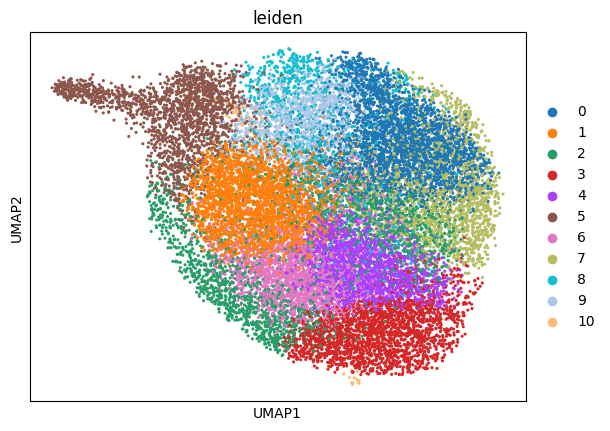

In [117]:
sc.pl.umap(cd4_adata, color='leiden', s=20)

In [127]:
markers = [
    'HAVCR2', 
    'CD7',
    'CD44', 
    'SELL', 'CCR7', 'IL7R', 'IFNG', 'TNF', 'PDCD1',
    'FOXP3',
    'CD27',
    'IL2RA',
    'CTLA4',
    'ICOS',
    'MKI67',
    'NT5E',
    'CD69']

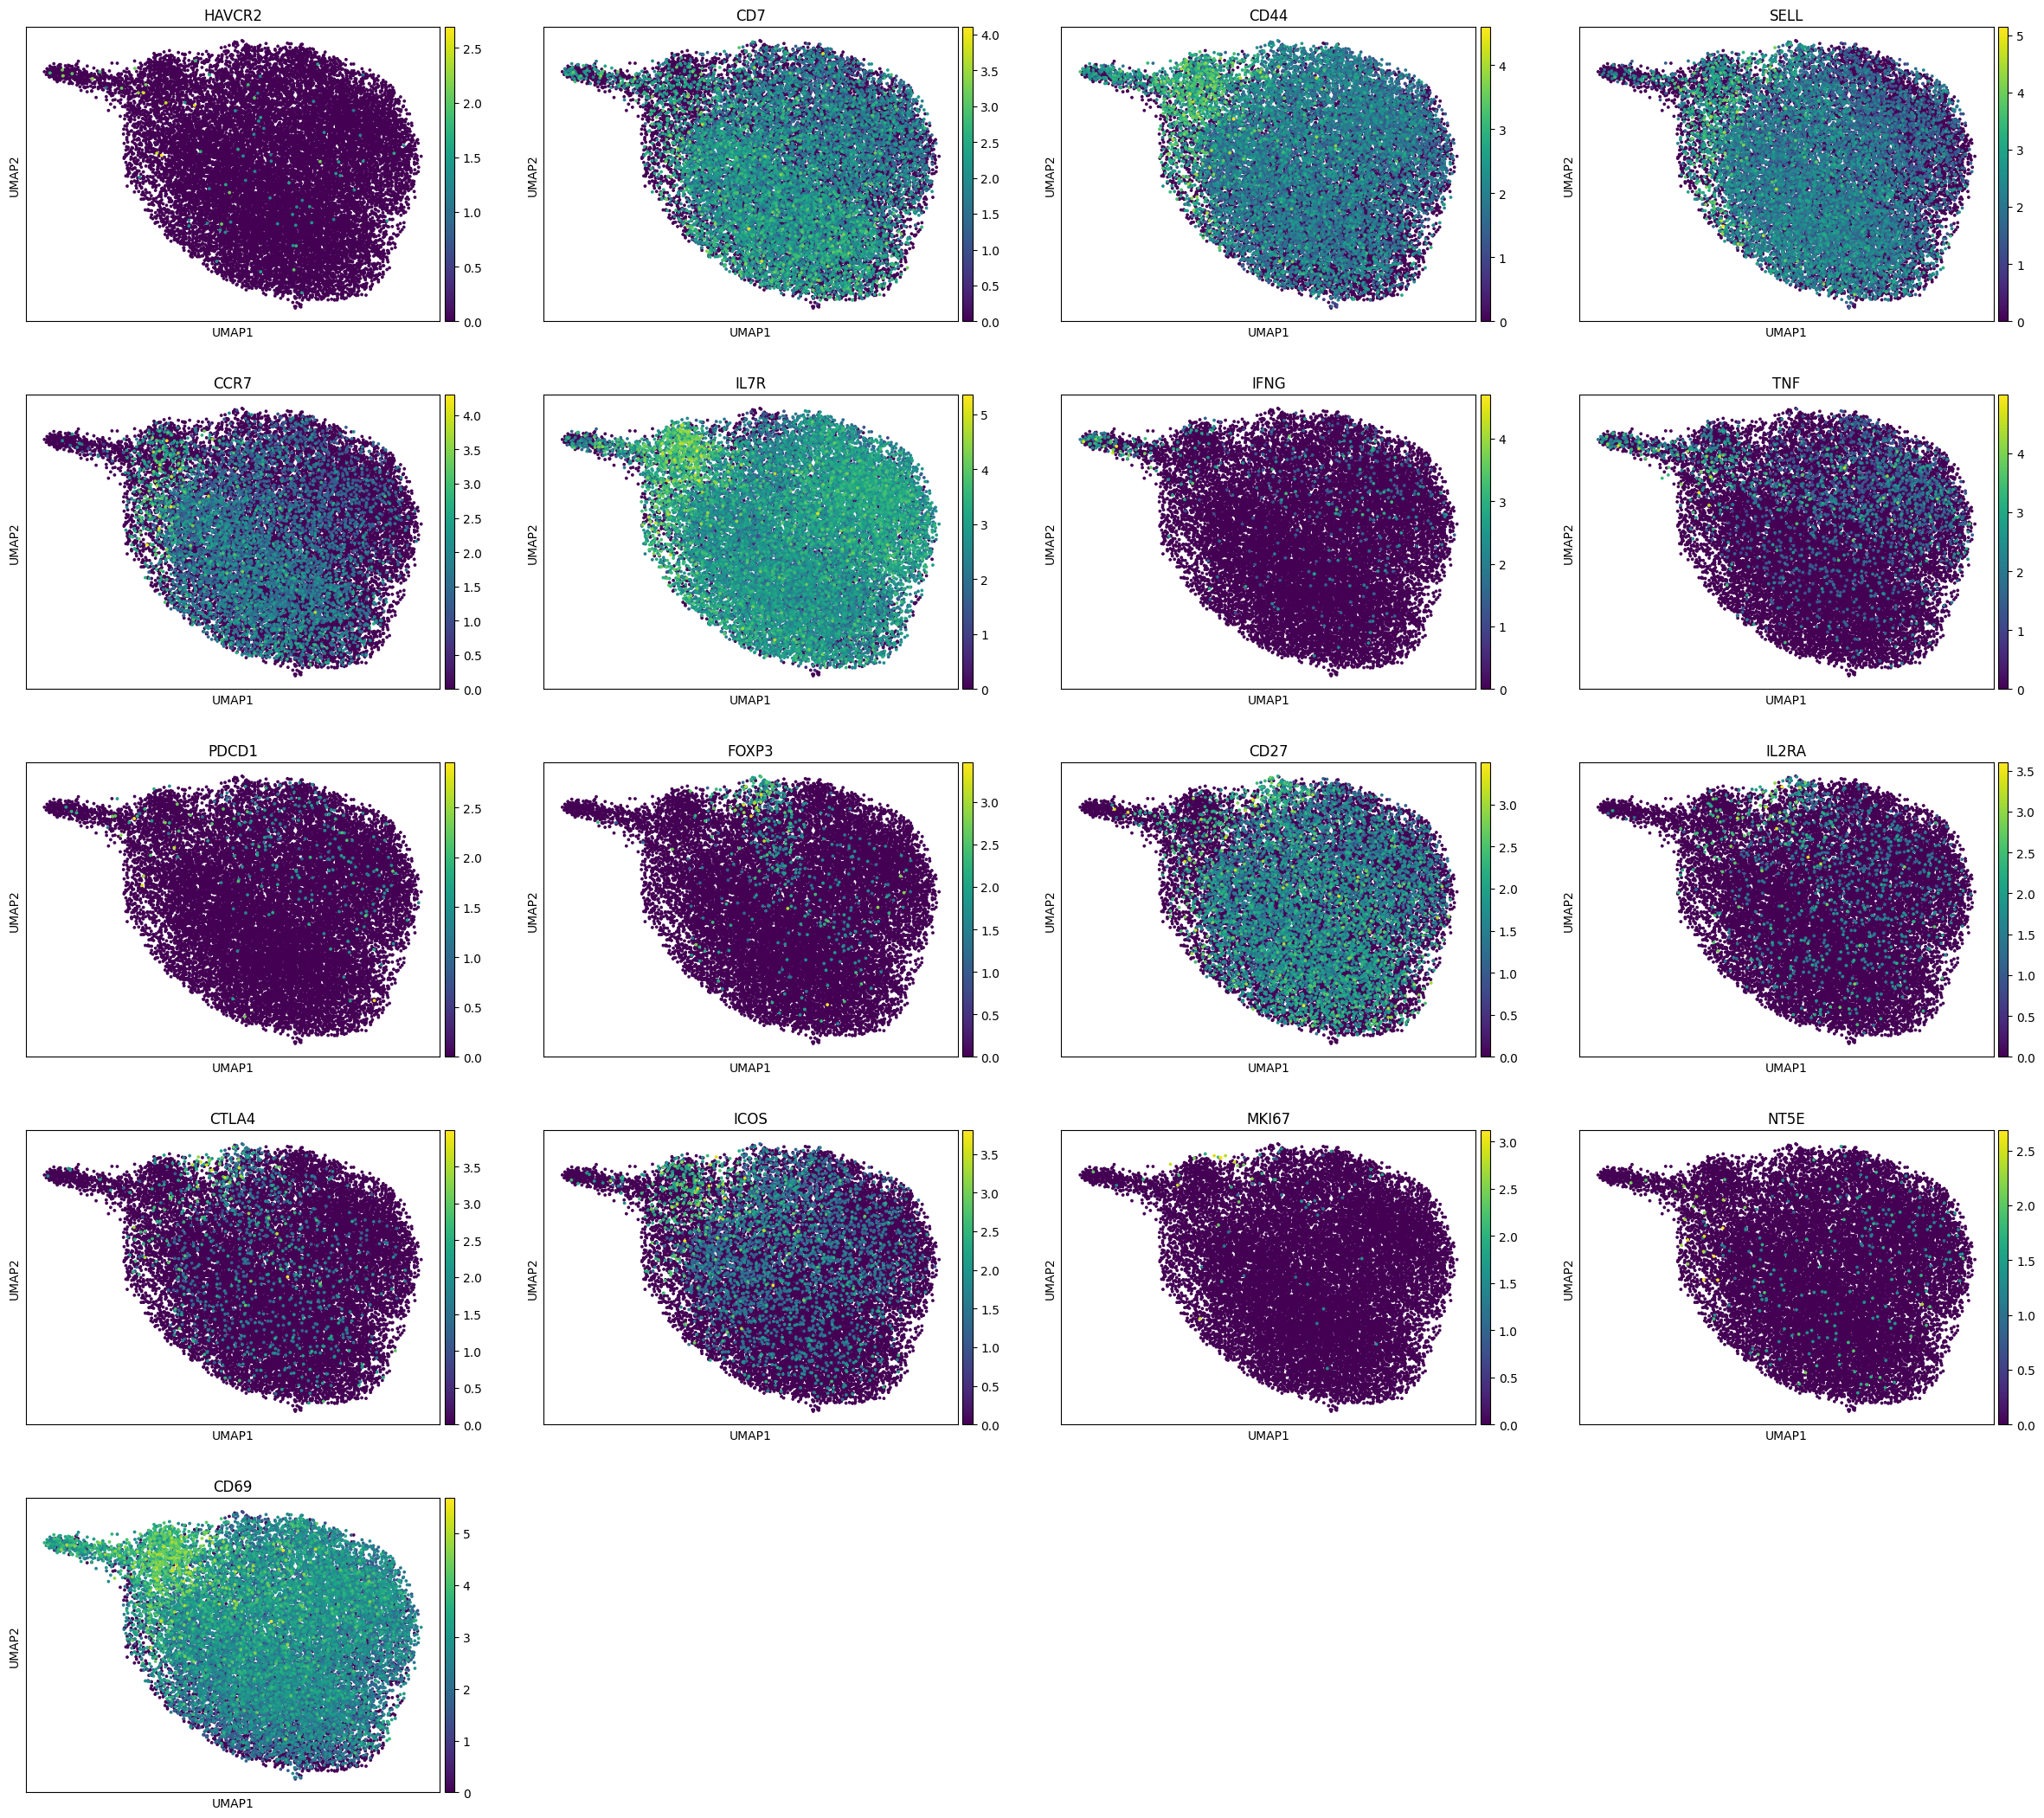

In [128]:
sc.pl.umap(cd4_adata, 
           color=markers, s=30)

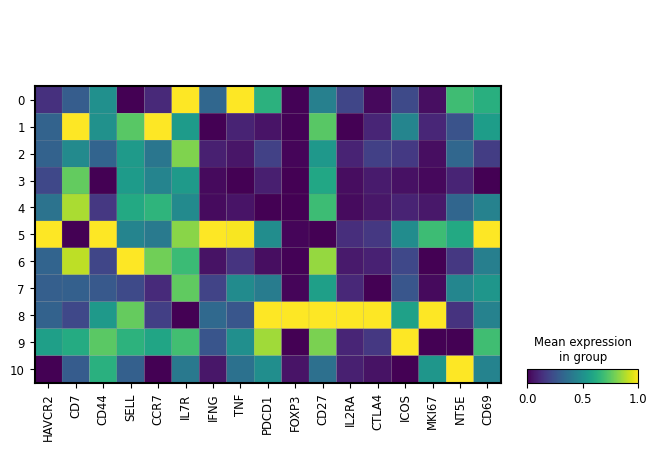

In [129]:
sc.pl.matrixplot(
    cd4_adata, 
    var_names=markers, 
    groupby='leiden', 
    use_raw=True,
    standard_scale='var')

In [136]:
cd4_mapping = {
'0':'EM CD4+ T',
'1':'naive CD4+ T', 
'2':'naive CD4+ T',
'3':'naive CD4+ T',
'4':'naive CD4+ T',
'5':'Proliferative CD4+ T',
'6':'naive CD4+ T',
'7':'EM CD4+ T',
'8':'Treg',
'9':'CM CD4+ T',
'10': 'Anergic CD4+ T'
}



In [137]:
cd4_adata.obs['fine_ct'] = cd4_adata.obs['leiden']\
    .apply(lambda x: cd4_mapping[x])

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


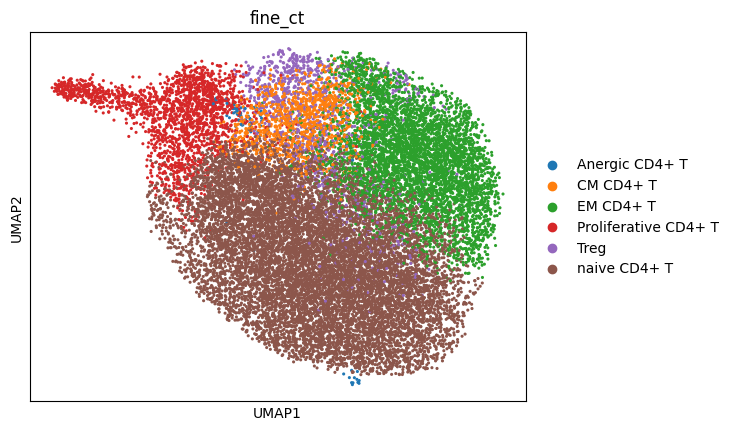

In [138]:
sc.pl.umap(cd4_adata, color='fine_ct', s=20)

In [140]:
cd4_adata.write('cd4_fine.h5ad')

### B cells

In [141]:
raw_adata = sc.read('../highly_variable.h5ad')
b_barcodes = adata.obs.index[adata.obs['qual_ct'].str.contains('B')]

In [142]:
len(b_barcodes)

5463

In [143]:
b_adata = raw_adata[b_barcodes].copy()

In [34]:
def hvg_scale_leiden(obj):

    sc.pp.highly_variable_genes(obj, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pp.scale(obj, max_value=10)
    sc.tl.pca(obj, svd_solver='arpack')
    sc.pp.neighbors(obj, n_neighbors=50, n_pcs=25)
    sc.tl.umap(obj)
    sc.tl.leiden(obj)

In [145]:
b_adata.uns['log1p']["base"] = None

In [146]:
hvg_scale_leiden(b_adata)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


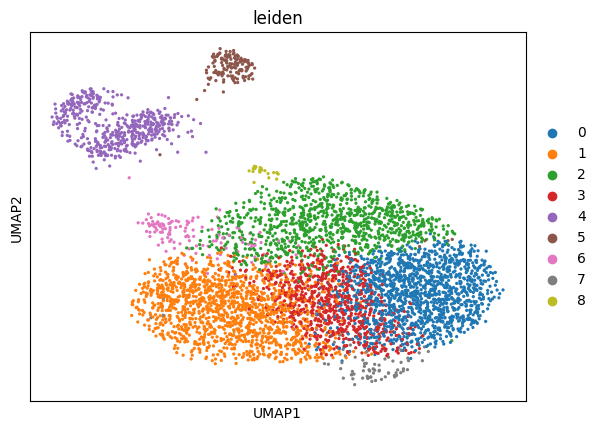

In [148]:
sc.pl.umap(b_adata, color='leiden')

In [167]:
'CD24' in adata.raw.var.index

True

In [168]:
markers = [
    'IGHD', 
    'IGHM', 
    'IGHG1', 
    'CD27', 
    'CD38', 'CR2', 'MS4A1','CD24']
    

In [169]:
# ighd ighm ighg1 cd27 cd24 cd38 cd21 cd138 cd20

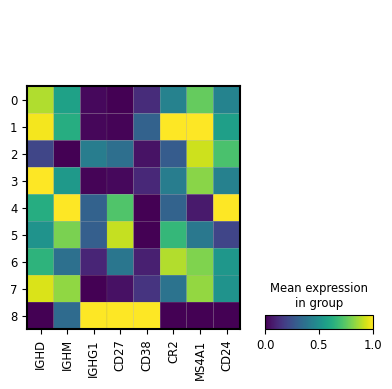

In [170]:
sc.pl.matrixplot(
    b_adata, 
    var_names=markers, 
    groupby='leiden', 
    use_raw=True,
    standard_scale='var')

In [176]:
b_mapping = {
'0':'naive B',
'1':'naive B', 
'2':'Transitional B1',
'3':'naive B',
'4':'memory B',
'5':'Plasma cells',
'6':'MZ B',
'7':'naive B',
'8':'memory B',
}



In [177]:
b_adata.obs['fine_ct'] = b_adata.obs['leiden']\
    .apply(lambda x: b_mapping[x])

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


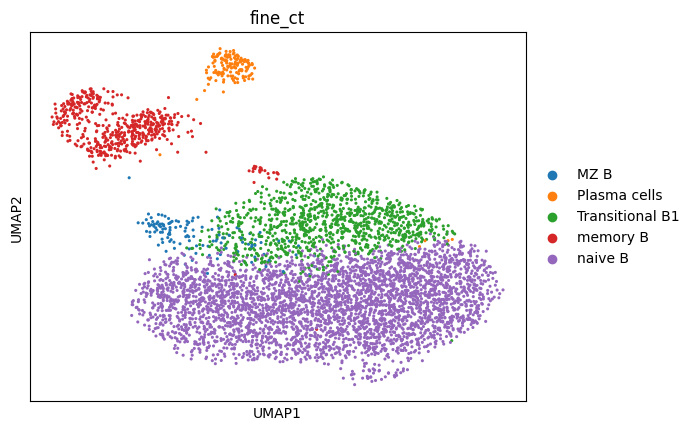

In [178]:
sc.pl.umap(b_adata, color='fine_ct', s=20)